# Praxis - Hyperparameter - Tiefe des Netzes

Hier wird wieder auf den MNIST Datensatz zurückgegriffen, um den Einfluss der Learning Rate auf die Performance des Netzes zu zeigen

## Import der benötigten Bibliotheken und Klassen

In [0]:
# magic command for Colab Notebooks
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Activation, Input, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model

# jupyters magic command
%matplotlib inline

## Laden des MNIST Datensatzes

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(len(x_train), ' train images found')
print(len(x_test), ' test images found')


11493376/11490434 [==============================] - 0s 0us/step
60000  train images found
10000  test images found


## Anpassung des MNIST Datensatzes

Hier werden für das Training nur 1/7 der Trainingsdaten verwendet

In [0]:
# specify count of used images, e.g. if you want to train with less data
NUM_PICTURES = len(x_train)//70
NUM_TEST_PICTURES = len(y_train)
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train[:NUM_PICTURES]
y_train = y_train[:NUM_PICTURES]
x_test = x_test[:NUM_TEST_PICTURES]
y_test = y_test[:NUM_TEST_PICTURES]
print(len(x_train), ' train images used')
print(len(x_test), ' test images used')

857  train images used
10000  test images used


Da Keras 4D Tensoren für die Verarbeitung erwartet, werden hier die Daten reshaped

In [0]:
x_train = np.reshape(x_train, [len(x_train), 28, 28, 1])
x_test = np.reshape(x_test, [len(x_test), 28, 28, 1])
print('shape: ', x_train.shape)

shape:  (857, 28, 28, 1)


Um mit der Categorical Crossentropy Funktion zu arbeiten werden die Labels in `categorical` labels umgewandelt

In [0]:
# convert class vectors to one-hot-encodings
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

## Helpers

## Über das `deeplearning2020` python package stellen wir euch folgende helper Funktionen zur Verfügung:

- def plot_learning_curve(title, x, y, y_test, ylim=0.6)
- def plot_history(title, history, ylim=0.6)
- def plot_images(images, labels)

## Zur Nutzung der Funktionen geht ihr folgendermaßen vor:


In [0]:
# Importieren der Helper Function
!pip install --upgrade deeplearning2020

from deeplearning2020 import helpers

#helpers.plot_images(image, labels)

     |████████████████████████████████| 399kB 3.8MB/s 
  Created wheel for deeplearning2020: filename=deeplearning2020-0.4.8-py2.py3-none-any.whl size=6424 sha256=2995b18a578c1eebf51064ee6d2cf454ff0a371c9e1cf41486fb7d915e19e427
  Stored in directory: /root/.cache/pip/wheels/e3/b0/4a/8a76f8d4841cbb93d270edd2a88685d7209aef0a08d0af2fc6
  Created wheel for kerasltisubmission: filename=kerasltisubmission-0.4.5-py2.py3-none-any.whl size=7532 sha256=e1166d2d61924526cd92b088048363f073e32cc3038c9f53195963f048981a0e
  Stored in directory: /root/.cache/pip/wheels/17/0e/e3/6022cb4bec452a01b8629e91249cdb917c7c509270bf314a0b
Successfully built deeplearning2020 kerasltisubmission


## Hier wird das Model definiert

In [0]:
def get_untrained_model(number_filters, number_dense_neurons):
    input_layer = Input(shape=(28, 28, 1))

    model = Conv2D(filters=number_filters, kernel_size=(3,3), activation="relu")(input_layer)
    model = MaxPooling2D((2,2))(model)
    model = Conv2D(filters = number_filters, kernel_size=(3,3), activation="relu")(model)
    model = MaxPooling2D((2,2))(model)
    # model = Dropout(0.25)(model)
    model = Flatten()(model)
    model = Dense(number_dense_neurons, activation="relu")(model)
    # model = Dropout(0.5)(model)

    output = Dense(10, activation="sigmoid")(model)
    
    return Model(input_layer, output)

## Hier werden die Models mit verschiedenen Konfigurationen trainiert

Dabei werden sowohl die filter_size, als auch die Anzahl der Dense Neuronen geändert

Folgende Konfigurationen werden verglichen:
- filter_size=32, number_dense_neurons=100
- filter_size=2, number_dense_neurons=20
- filter_size=1000, number_dense_neurons=1000

In [0]:
mnist_model = get_untrained_model(32, 100)

mnist_model.compile(
  optimizer = tf.keras.optimizers.Adam(0.0001), 
  loss = 'categorical_crossentropy', 
  metrics = ['accuracy']
)


mnist_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               80100 

In [0]:
history = mnist_model.fit(x_train, y_train, batch_size = 32, epochs = 10, validation_data = (x_test, y_test))

Train on 857 samples, validate on 10000 samples
Epoch 1/10
857/857 [==============================] - 4s 4ms/sample - loss: 2.2853 - accuracy: 0.2112 - val_loss: 2.2640 - val_accuracy: 0.2620
Epoch 2/10
857/857 [==============================] - 3s 3ms/sample - loss: 2.2443 - accuracy: 0.2835 - val_loss: 2.2190 - val_accuracy: 0.3135
Epoch 3/10
857/857 [==============================] - 3s 3ms/sample - loss: 2.1841 - accuracy: 0.4002 - val_loss: 2.1418 - val_accuracy: 0.4678
Epoch 4/10
857/857 [==============================] - 3s 3ms/sample - loss: 2.0781 - accuracy: 0.4959 - val_loss: 2.0074 - val_accuracy: 0.5433
Epoch 5/10
857/857 [==============================] - 3s 3ms/sample - loss: 1.8862 - accuracy: 0.6149 - val_loss: 1.7462 - val_accuracy: 0.6780
Epoch 6/10
857/857 [==============================] - 3s 3ms/sample - loss: 1.5090 - accuracy: 0.7690 - val_loss: 1.2878 - val_accuracy: 0.7406
Epoch 7/10
857/857 [==============================] - 3s 3ms/sample - loss: 1.0435 - acc

In [0]:
mnist_model_little = get_untrained_model(2, 20)
mnist_model_little.compile(optimizer = tf.keras.optimizers.Adam(lr=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_little = mnist_model_little.fit(x_train, y_train, batch_size = 32, epochs = 10, validation_data = (x_test, y_test))

Train on 857 samples, validate on 10000 samples
Epoch 1/10
857/857 [==============================] - 2s 3ms/sample - loss: 2.3101 - accuracy: 0.0642 - val_loss: 2.3094 - val_accuracy: 0.0619
Epoch 2/10
857/857 [==============================] - 2s 2ms/sample - loss: 2.3081 - accuracy: 0.0747 - val_loss: 2.3077 - val_accuracy: 0.0729
Epoch 3/10
857/857 [==============================] - 2s 2ms/sample - loss: 2.3064 - accuracy: 0.0887 - val_loss: 2.3063 - val_accuracy: 0.0830
Epoch 4/10
857/857 [==============================] - 2s 2ms/sample - loss: 2.3048 - accuracy: 0.0992 - val_loss: 2.3049 - val_accuracy: 0.0957
Epoch 5/10
857/857 [==============================] - 2s 2ms/sample - loss: 2.3032 - accuracy: 0.1074 - val_loss: 2.3037 - val_accuracy: 0.1047
Epoch 6/10
857/857 [==============================] - 2s 2ms/sample - loss: 2.3019 - accuracy: 0.1237 - val_loss: 2.3026 - val_accuracy: 0.1145
Epoch 7/10
857/857 [==============================] - 2s 2ms/sample - loss: 2.3006 - acc

In [0]:
mnist_model_big = get_untrained_model(1000, 1000)
mnist_model_big.compile(optimizer = tf.keras.optimizers.Adam(0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_big = mnist_model_big.fit(x_train, y_train, batch_size = 32, epochs = 10, validation_data = (x_test, y_test))

Train on 857 samples, validate on 10000 samples
Epoch 1/10
857/857 [==============================] - 507s 591ms/sample - loss: 1.6682 - accuracy: 0.5146 - val_loss: 0.7197 - val_accuracy: 0.7682
Epoch 2/10
857/857 [==============================] - 496s 579ms/sample - loss: 0.5481 - accuracy: 0.8401 - val_loss: 0.4660 - val_accuracy: 0.8509
Epoch 3/10
857/857 [==============================] - 504s 589ms/sample - loss: 0.3411 - accuracy: 0.9067 - val_loss: 0.3092 - val_accuracy: 0.9080
Epoch 4/10
857/857 [==============================] - 502s 585ms/sample - loss: 0.2006 - accuracy: 0.9428 - val_loss: 0.2650 - val_accuracy: 0.9182
Epoch 5/10
857/857 [==============================] - 504s 588ms/sample - loss: 0.1336 - accuracy: 0.9627 - val_loss: 0.2300 - val_accuracy: 0.9288
Epoch 6/10
857/857 [==============================] - 504s 588ms/sample - loss: 0.1133 - accuracy: 0.9673 - val_loss: 0.2462 - val_accuracy: 0.9225
Epoch 7/10
857/857 [==============================] - 510s 595ms

## Auswertung der Ergebnisse:

Im ersten Diagramm ist Underfitting zu erkennen, da das Netz zu klein ist

Im zweiten Diagramm ist Overfitting zu erkennen, da da Netz zu komplex ist

Im dritten Diagramm ist ein schöner Trainingsverlauf zu erkennen

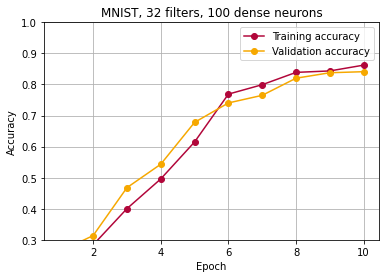

In [0]:
helpers.plot_history('MNIST, 32 filters, 100 dense neurons', history, 0.3)

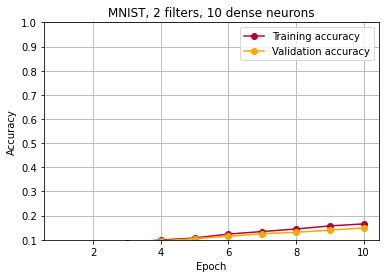

In [0]:
helpers.plot_history('MNIST, 2 filters, 10 dense neurons', history_little, 0.1)

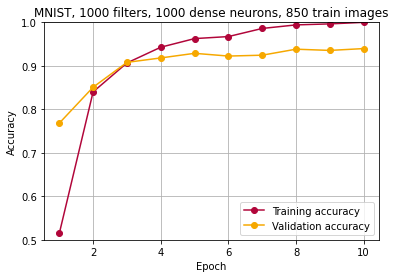

In [0]:
helpers.plot_history('MNIST, 1000 filters, 1000 dense neurons, 850 train images', history_big, 0.5)